# KNN Modeling

## Import packages and modules

In [2]:
import csv
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from imblearn.under_sampling import RandomUnderSampler 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

## Import data

In [3]:
%run /Users/apassan/Documents/03_Professional/07_GitHubRepo/APassan_Portfolio/Classification_CreditCardFraud/scripts/model_prep.py

### Confirm X and Y Shapes

In [4]:
# Print the shapes to ensure the matrix dimensions line up
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)


X_train shape: (139844, 7)
Y_train shape: (139844,)
X_test shape: (34962, 7)
Y_test shape: (34962,)


## Model Building - KNN

We will first write a function setting up our knn model.

In [5]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,Y_train)
    Y_pred = knn_model.predict(X_test)
    error_rate.append(np.mean(Y_pred != Y_test))

Text(0, 0.5, 'Error Rate')

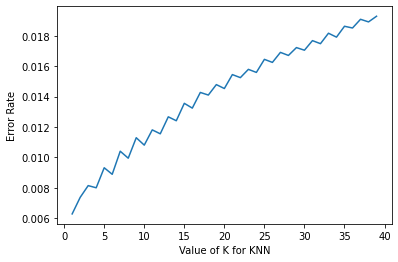

In [6]:
plt.plot(range(1,40), error_rate)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error Rate')  

Based on the above graph, it looks like the optimal value for k will likely be either 3.

In [6]:
## Test k = 3 - with K-5 Cross validation 

# Create KNN model 
knn_model3 = KNeighborsClassifier(n_neighbors=3, algorithm = 'auto')

#train model with cv of 5 
cv_scores3 = cross_val_score(knn_model3, X_us, Y_us, cv=5)

print(cv_scores3)
accuracy_fin3 = np.mean(cv_scores3)
print('knn_model3 accuracy:', accuracy_fin3)


[0.99210571 0.99207689 0.9930494  0.99333543 0.99210549]
knn_model3 accuracy: 0.9925345836462643


In [9]:
knn3 = KNeighborsClassifier(n_neighbors=3, algorithm='auto')
knn3.fit(X_train, Y_train)
preds3 = knn3.predict_proba(X_test)[:,1]
print('Accuracy: %1.4f' %accuracy_score(Y_test, preds3>.5))
print('AP: %1.4f' %average_precision_score(Y_test, preds3))

Accuracy: 0.9928
AP: 0.9937


### Extra Code

In [ ]:
# All features
k_range = range(1,10)

scores = {}

scores_list = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores[k] = metrics.accuracy_score(Y_test, Y_pred)
    scores_list.append(metrics.accuracy_score(Y_test, Y_pred))

    
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')  

In [ ]:
# Get Accuracy 
Y_pred_prob = model.predict_proba(X_test)
print('Accuracy: %1.4f' %accuracy_score(Y_test, Y_pred_prob>.5))
print('AP: %1.4f' %average_precision_score(Y_test, Y_pred_prob))

In [ ]:
train_1 = X_train.iloc[:, 6:]
train_2 = X_train.iloc[:, 5:]
train_3 = X_train.iloc[:, 4:]
train_4 = X_train.iloc[:, 3:]
train_5 = X_train.iloc[:, 2:]
train_6 = X_train.iloc[:, 1:]
train_7 = X_train.iloc[:, 0:]

test_1 = X_test.iloc[:, 6:]
test_2 = X_test.iloc[:, 5:]
test_3 = X_test.iloc[:, 4:]
test_4 = X_test.iloc[:, 3:]
test_5 = X_test.iloc[:, 2:]
test_6 = X_test.iloc[:, 1:]
test_7 = X_test.iloc[:, 0:]